# Практическое задание 4

## Выполнил: Филиппова Екатерина Викторовна

Этапы выполнения: 

<font color="red">Уважаемые слушатели, перед началом выполнения данной практический работы, пожалуйста, ознакомтесь со всеми материалами на платформе Odin по темам 6.1-6.2!</font>

1. Загрузить текст на русском языке из файла (файл test.txt, объем файла ~ 200 Кб) текст выбрать самостоятельно
2. Удалить стоп-слова и знаки препинания
3. Выполнить токенизацию, подсчёт слов и анализ документа DataFrame (Слово|Количество|Ранг|Процент)
4. Построить гистограмму, treepmap, облако слов   

Опубликовать файл расширения ipynb на платформу Odin.

## 1. Загружаем файл и делим на токены 

In [2]:
import spacy 
import pandas as pd
import re
from collections import Counter
import squarify
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
plt.rc('figure', figsize=(10, 6))
import seaborn as sns

In [3]:
nlp = spacy.load("ru_core_news_sm")

def spacy_tokenize(text):
    doc = nlp.tokenizer(text)
    return [token.text for token in doc]

In [4]:
with open("test.txt") as file:
    text = file.read()
    spacy_tokens = spacy_tokenize(text)
    

In [5]:
spacy_tokens[:10]

['Обитаемый',
 'остров',
 '\n',
 'Аркадий',
 'Натанович',
 'Стругацкий',
 '\n\n',
 'Борис',
 'Натанович',
 'Стругацкий']

## 2. Удаляем стоп-слова и знаки препинания 

In [6]:
spacy_stopwords = spacy.lang.ru.stop_words.STOP_WORDS
spacy_stopwords.update(['ни', "без", "под", "со", "\xa0", '\n'])
def remove_stopwords(tokens):
    cleaned_tokens = []  
    punct = '!"#$%&\'():*+,-./:;<=>?@[\\]^_`{|}~..–—«» …'
     
    for token in tokens:
        if (token.lower() not in spacy_stopwords) & (token not in punct)&('\n' not in token):
            cleaned_tokens.append(token)
    
    return cleaned_tokens


cleaned_tokens = remove_stopwords(spacy_tokens)
print('Всего токенов', len(cleaned_tokens))
cleaned_tokens[:10]

Всего токенов 17378


['Обитаемый',
 'остров',
 'Аркадий',
 'Натанович',
 'Стругацкий',
 'Борис',
 'Натанович',
 'Стругацкий',
 'Трилогия',
 'Максиме']

## 3. Выполняем подсчет слов

In [7]:
def count(docs):
  
    word_counts = Counter()
    appears_in = Counter()
    total_docs = len(docs)
    
    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))
        
    temp = list(zip(word_counts.keys(), word_counts.values()))
    
    # Колонки слов и количества
    df = pd.DataFrame(temp, columns = ['word', 'count'])
    
    # Колонка ранга
    df['rank'] = df['count'].rank(method='first', ascending=False)
    
    # Колонка с общим процентом
    total = df['count'].sum()
    df['percent'] = df['count'].apply(lambda x: x / total)
       
    return df.sort_values(by='rank')
  
df = count([cleaned_tokens])

df.head()


,word,count,rank,percent
20,Максим,245,1.0,0.014098
419,сказал,128,2.0,0.007366
2105,ротмистр,102,3.0,0.005869
1957,Гай,100,4.0,0.005754
2104,господин,68,5.0,0.003913


## 4.1. Гистограмма 

In [8]:
top_10 = df.head(10)
top_10

,word,count,rank,percent
20,Максим,245,1.0,0.014098
419,сказал,128,2.0,0.007366
2105,ротмистр,102,3.0,0.005869
1957,Гай,100,4.0,0.005754
2104,господин,68,5.0,0.003913
1741,Максима,58,6.0,0.003338
415,очень,57,7.0,0.003280
6034,Панди,55,8.0,0.003165
519,потом,45,9.0,0.002589
785,вдруг,45,10.0,0.002589


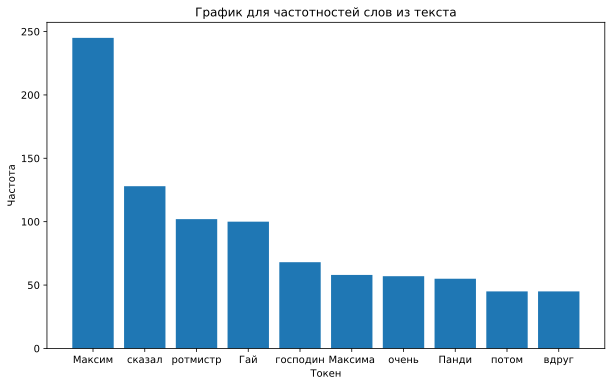

In [9]:
x = top_10['word']
y = top_10['count']

plt.bar(x, y)
plt.title('График для частотностей слов из текста')
plt.xlabel('Токен')
plt.ylabel('Частота')
plt.show()

## 4.2 Treemap

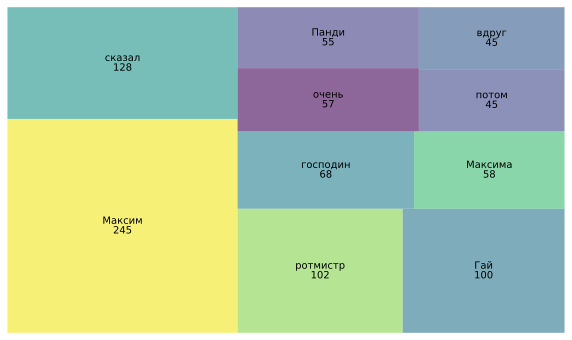

In [10]:
squarify.plot(sizes=top_10['percent'], label=top_10['word'], value=top_10['count'], alpha=.6 )
plt.axis('off')
plt.show();

## 4.3. Облако слов

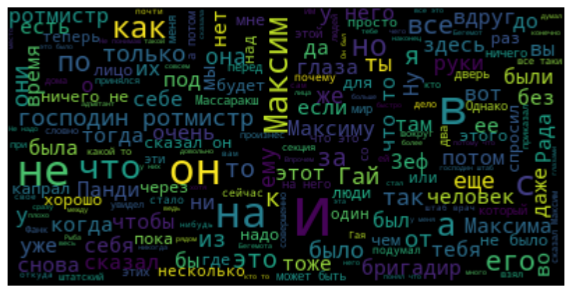

In [11]:
wordcloud = WordCloud(max_font_size=50).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Облако слов (без стоп-слов)

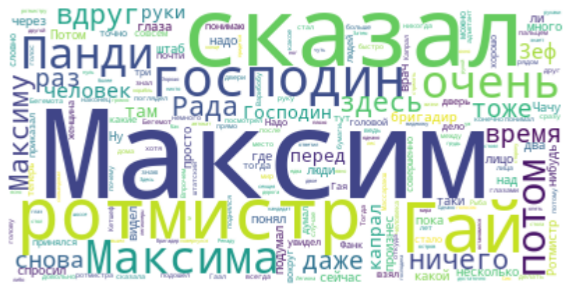

In [12]:
d = df.to_dict('records')
new_dic = {}
for i in d:
    new_dic[i['word']] = int(i['count'])
wordcloud = WordCloud(relative_scaling=0.5,normalize_plurals=False,background_color="white").generate_from_frequencies(new_dic)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


**Это дополнительное задание, оно не обязательное и не будет оцениваться.** 😉

5. Используя networkx и matplotlib, построить граф, где узлы - это друзья. Количество узлов ограничить до 20. Узлы подписать "Имя". Входные данные должны загружаться из файла json.

Тут на ваш выбор, либо вы сами заполняете исходный файл с друзьями, либо получаете по API VK. При отправки на проверку прикрепите файл json на Odin.

In [13]:
import requests
import json
import networkx as nx
import community.community_louvain as community
import time
import collections

In [14]:
t = 'vk1.a.*********'

In [15]:
# получаем список друзей для указанного id 
def get_friends_ids(user_id):
    url = 'https://api.vk.com/method/friends.get?v=5.131'
    params = {'user_id': user_id,
          'count': 9,
          'fields': 'id',
          'access_token': t}
    json_response = requests.get(url, params).json()
    if json_response.get('error'):
        print(json_response.get('error'))
        return list()
    return json_response[u'response']

# изначальные узлы графов
nodes = get_friends_ids('609538508')
nodes['items']

[{'id': 35625,
  'track_code': '23469baeDykprpb2BRBz_fUjeee2Z12ej1tREfaIKCzjvYU87e5iQifPqvVVEnSq85O7Oh8EPfj9MjQ',
  'first_name': 'Irina',
  'last_name': 'Iakovleva',
  'can_access_closed': True,
  'is_closed': False},
 {'id': 110271,
  'track_code': '521da40aJgx0WvanvLw2_XEQ9wgx6n4qSck-hCbD-nC2kPRonIhLZyo4xaW0vWX4Qcs5xoGHCT47oFvq',
  'first_name': 'Анита',
  'last_name': 'Гут',
  'can_access_closed': True,
  'is_closed': False},
 {'id': 124598,
  'track_code': '7623ed1bqpsax7bGZSfLyhLzIjoJ-vUwlQlleGmpl_ZFCEcwV67H8Enz0sdiIs7LKCjs9LmXgiTnYAAW',
  'first_name': 'Надежда',
  'last_name': 'Веселова',
  'can_access_closed': True,
  'is_closed': False},
 {'id': 946915,
  'track_code': 'ced30f0bqQwSBGiWDS-2oaw-YQwsdpENBJWMBZQpu_PCAz5ycqDEZ0BnC5cAK7iimuWvwpwb5hl2_Olr',
  'first_name': 'Катерина',
  'last_name': 'Никитина',
  'can_access_closed': True,
  'is_closed': True},
 {'id': 1333082,
  'track_code': 'b093c720S6Bk9KTBYwnWOPwrAFTXdzoXPUsxOlkvz11vBdT3gMMmy22Sx8JpAtU4wMSllnQDQxQ9IlRUPQ',
  '

In [17]:
# связи, какие друзья есть у узлов

links = {}

for item in nodes['items']:
    friend_id = item['id']
    links[friend_id] = get_friends_ids(friend_id)
    time.sleep(1)
links

{35625: {'count': 685,
  'items': [{'id': 10566,
    'track_code': '40de6dfePgnK5bgNofe4RJdTeZXIdA7cNiExHMAW62gXXTAhQlNTYseDiATzpOtLkf_gZ00WbrpESFQ',
    'first_name': 'Александр',
    'last_name': 'Виноградов',
    'can_access_closed': True,
    'is_closed': False},
   {'id': 15691,
    'track_code': 'c573d44czbee_5RXr9_sBGkBZ7aVCpy2R2ApdofZ1byf8vxD6Vyg3JGZowT43rcDbq3-RBBo_NA1CUw',
    'first_name': 'Назар',
    'last_name': 'Приходько',
    'can_access_closed': False,
    'is_closed': True},
   {'id': 22330,
    'track_code': '5ef88788j3vB1lKUPe_YIJUVS6XUTwiQ68zbMNHmo17Z76SUbnfiEJ3lNZdq74hzkbnSV1EtaPaZpb4',
    'first_name': 'Кирилл',
    'last_name': 'Балков',
    'can_access_closed': True,
    'is_closed': False},
   {'id': 34105,
    'track_code': '695773f7SOT0amikl4GpeaeuYys0tJUrgq19wzWkYSJE8mmfqHolj_wJDKDCgPx8ogL62bHW9U3wxBg',
    'first_name': 'Дмитрий',
    'last_name': 'Казанцев',
    'can_access_closed': False,
    'is_closed': True},
   {'id': 41555,
    'track_code': '08fe

In [26]:
# собираем все в один файл
friends_list = {'nodes': [], 'links': []}

friends_list['nodes'].append({'id': '609538508', 'name': 'Екатерина'})
for j in nodes['items']:
        friends_list['links'].append({'source': '609538508', 'source name': 'Екатерина', 'target': str(j['id']), 'target name': str(j['first_name'])})
for i in nodes['items']:
    friends_list['nodes'].append({'id': str(i['id']), 'name': str(i['first_name'])})
    for j in links[i['id']]['items']:
        friends_list['links'].append({'source': str(i['id']), 'source name': str(i['first_name']), 'target': str(j['id']), 'target name': str(j['first_name'])})
friends_list

{'nodes': [{'id': '609538508', 'name': 'Екатерина'},
  {'id': '35625', 'name': 'Irina'},
  {'id': '110271', 'name': 'Анита'},
  {'id': '124598', 'name': 'Надежда'},
  {'id': '946915', 'name': 'Катерина'},
  {'id': '1333082', 'name': 'Дима'},
  {'id': '1342126', 'name': 'Варвара'},
  {'id': '1504413', 'name': 'Виктория'},
  {'id': '2368410', 'name': 'Елена'},
  {'id': '6107587', 'name': 'Кристина'}],
 'links': [{'source': '609538508',
   'source name': 'Екатерина',
   'target': '35625',
   'target name': 'Irina'},
  {'source': '609538508',
   'source name': 'Екатерина',
   'target': '110271',
   'target name': 'Анита'},
  {'source': '609538508',
   'source name': 'Екатерина',
   'target': '124598',
   'target name': 'Надежда'},
  {'source': '609538508',
   'source name': 'Екатерина',
   'target': '946915',
   'target name': 'Катерина'},
  {'source': '609538508',
   'source name': 'Екатерина',
   'target': '1333082',
   'target name': 'Дима'},
  {'source': '609538508',
   'source name': 

In [27]:
# сохраняем json файл
with open('json_data.json', 'w') as outfile:
    json.dump(friends_list, outfile)

In [28]:
len(friends_list['links'])

90

In [29]:
labels = {}
for j in range(1, len(friends_list['links'])):
    labels[friends_list['links'][j]['target']] = friends_list['links'][j]['target name']
    labels[friends_list['links'][j]['source']] = friends_list['links'][j]['source name']


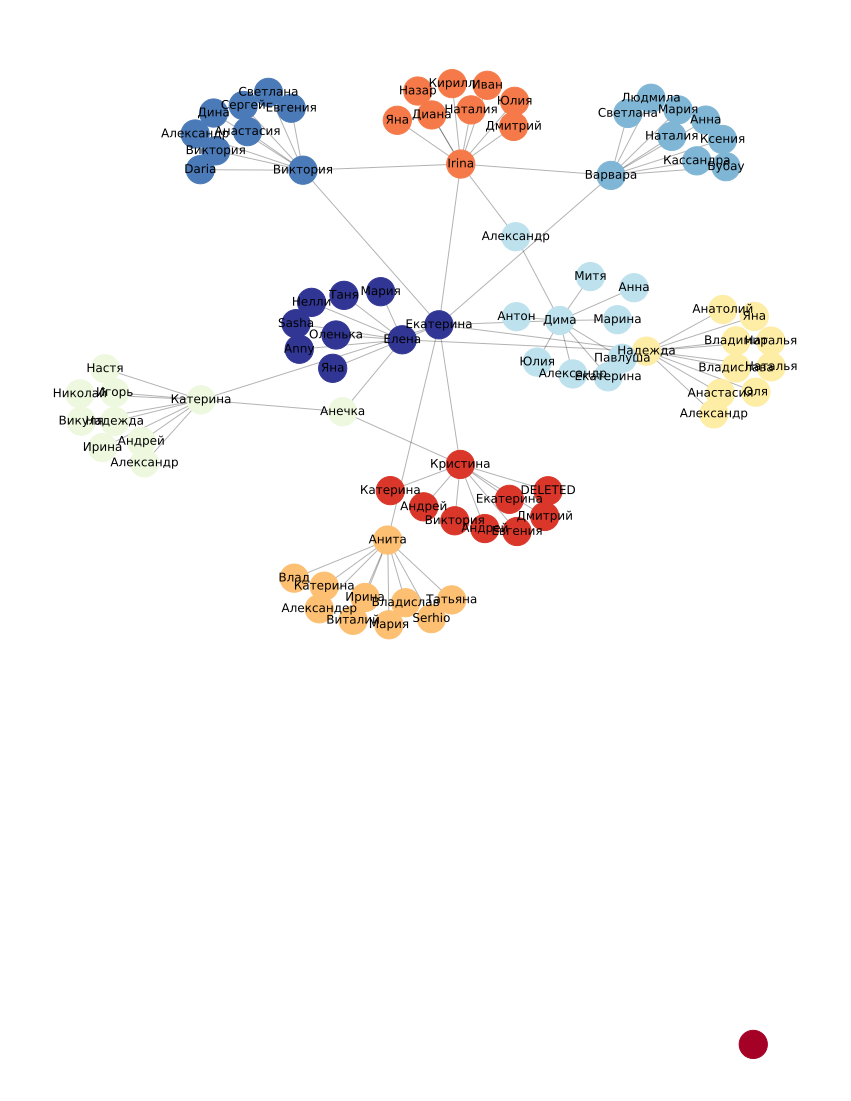

In [30]:
plt.figure(figsize=(15,20))

graph = None

with open('json_data.json') as json_file:
    graph = json.load(json_file)
    
G = nx.Graph()

G.add_nodes_from([(node['id'] for node in graph['nodes'])])

G.add_edges_from([(edge['source'], edge['target'])
                  for edge in graph['links']])

partition = community.best_partition(G) 

pos = nx.spring_layout(G) 

plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=800, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.3)
nx.draw_networkx_labels(G, pos, labels=labels)
plt.show(G)

## 6. Проанализировать датасет telecom_churn.csv . 

6.1 Построить распределение целевого класса – оттока клиентов (гистограмма по одному признаку). 

6.2 Построить гистограммы изменения значений бинарных признаков International plan и Voice mail plan для лояльных и ушедших клиентов.

In [31]:
import numpy as np
import pandas as pd

In [32]:
df1 = pd.read_csv("telecom_churn.csv")
df1.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


<AxesSubplot:xlabel='Churn', ylabel='count'>

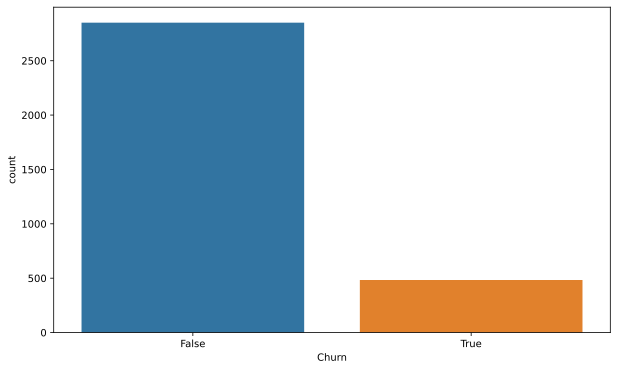

In [33]:
sns.countplot(x="Churn", data=df1)


<AxesSubplot:xlabel='International plan', ylabel='count'>

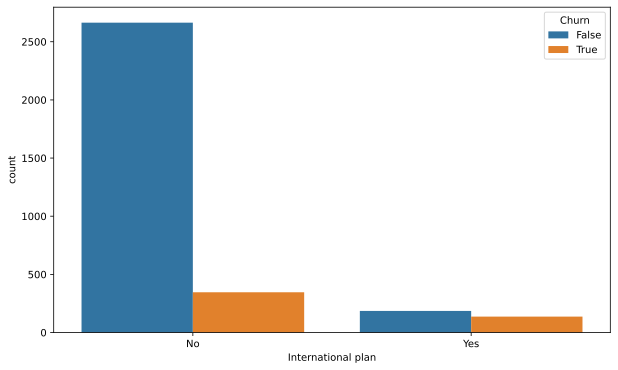

In [34]:
sns.countplot(x="International plan", hue="Churn", data=df1)

<AxesSubplot:xlabel='Voice mail plan', ylabel='count'>

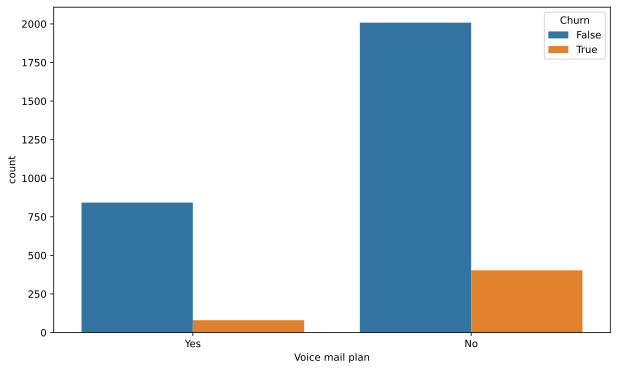

In [35]:
sns.countplot(x="Voice mail plan", hue="Churn", data=df1)

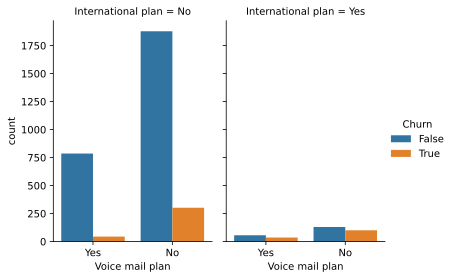

In [36]:
g = sns.catplot(x="Voice mail plan", 
                hue="Churn", col="International plan",
                data=df1, kind="count",
                height=4, aspect=.7);